In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('data/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [73]:
labels=np.unique(df['label'].values)
labels
  

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [70]:
label_encoder = preprocessing.LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])
np.unique(df['label'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [24]:
X = df.values[:, 0:-1]
Y = df.values[:, -1]

In [27]:
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:

model = tf.keras.models.Sequential([tf.keras.layers.Dense(units = 7, input_shape = [7], activation = 'relu'),
                                    tf.keras.layers.Dense(units = 64, activation = 'relu'),
                                    tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                    tf.keras.layers.Dense(units = 22, activation = 'softmax')])


In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_13 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 22)                2838      
Total params: 11,726
Trainable params: 11,726
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [62]:
history = model.fit(X_train, y_train, epochs = 400)

Epoch 1/400
55/55 [==============================] - 0s 661us/step - loss: 3.1087 - accuracy: 0.0604
Epoch 2/400
55/55 [==============================] - 0s 650us/step - loss: 3.0315 - accuracy: 0.0774
Epoch 3/400
55/55 [==============================] - 0s 650us/step - loss: 2.9733 - accuracy: 0.0810
Epoch 4/400
55/55 [==============================] - 0s 636us/step - loss: 2.9188 - accuracy: 0.0955
Epoch 5/400
55/55 [==============================] - 0s 631us/step - loss: 2.8281 - accuracy: 0.1272
Epoch 6/400
55/55 [==============================] - 0s 650us/step - loss: 2.7567 - accuracy: 0.1710
Epoch 7/400
55/55 [==============================] - 0s 647us/step - loss: 2.6858 - accuracy: 0.2165
Epoch 8/400
55/55 [==============================] - 0s 641us/step - loss: 2.6241 - accuracy: 0.2484
Epoch 9/400
55/55 [==============================] - 0s 633us/step - loss: 2.5214 - accuracy: 0.2926
Epoch 10/400
55/55 [==============================] - 0s 648us/step - loss: 2.4186 - accura

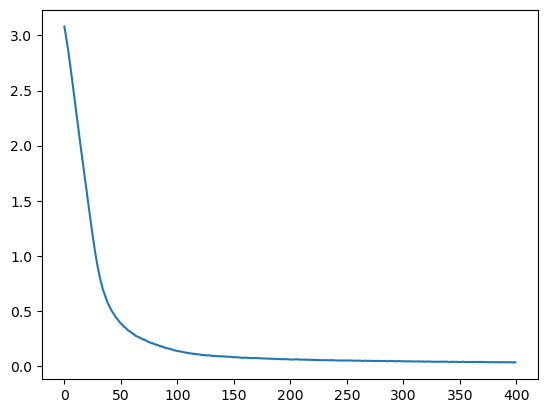

In [63]:
loss = history.history['loss']
plt.plot(loss)


In [66]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 855us/step - loss: 0.1011 - accuracy: 0.9727


[0.10108429193496704, 0.9727272987365723]